Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 06: Hough Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, December 12, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [1]:
# YOUR CODE HERE

## Assignment 1: Hough transform [7 Points]

**a)** Explain in your own words the idea of Hough transform in general. What is an accumulator space? In what sense can the Hough transform be seen as a model-based approach?

The Hough transform takes a detection of edge points with their location and direction as an input. This is for example given by the sobel filter. The edges are transformed to points in the accumulator space. These points build clusters which are analyzed and identified as straight lines. With advanced approaches not only lines but also more complex structures can be identified in the accumulator space.

The accumulator space is based on the Hesse normal form. The edge points given for example by the sobel filter are displayed in a space with the axis r and theta.

Hough transform can be seen as a model-based approach due to its step by step procedure and the very practical approach. One can imagine and visualize quite well how it works. Additionally, it can be generalized in many ways to detect more complex patterns and structures.

**b)** What is linear Hough transform? What does a point in the linear Hough space represent? Explain the meaning of the two coordinates.

The linear Hough transform is a feature extraction technique to identify lines and edges in an image. 

One point in the linear Hough space represents a piece of a straight edge/ line in the original image.  

r is the distance from the origin to the closest point on the straight line. theta is the angle between the x-axis (of the original image) and the line connecting the origin with that closest point

**c)**  How are points, lines, polygons transformed by linear Hough transform? What about parallel lines? Try different configurations using the functions `point`, `line`, `polygon` below. Use the function `skimage.transform.hough_line` to display these examples. You may use the code of Assignment 2 to check
different configurations interactively.

Points are represented as arcs

Lines are represented as wide arcs consisting of many individual arcs which all meet in one "intersection point" somewhere in the middle of the wide arc.

Polygons are represented as multiple wide arcs consisting of many individual arcs. This is quite logical, since polygons consist only of several lines that are combined to one polygon.  

Parallel lines are represented as two wide arcs consisting of many individual arcs. These two arcs look exactly the same and are just shifted to each other.

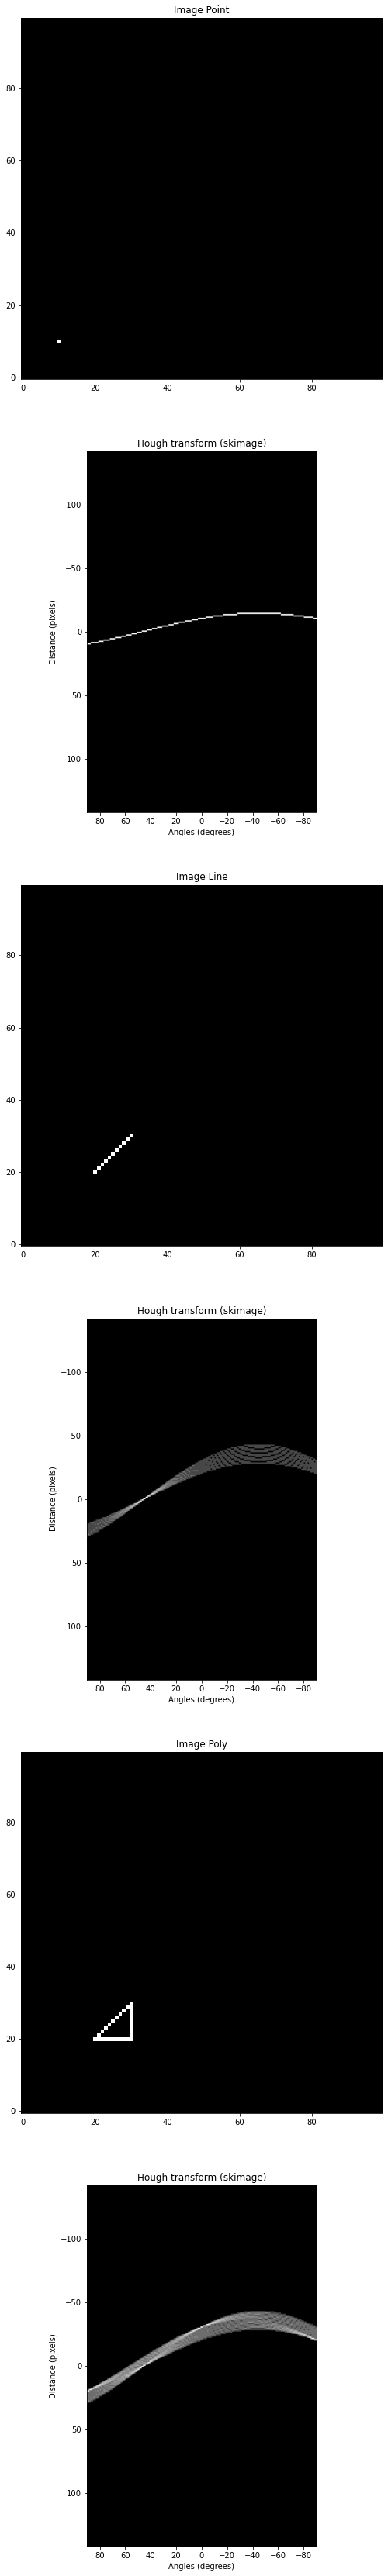

In [44]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p]=1
    
    return img

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    
    return img

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)
        
    return img

img = np.zeros((100,100))

img1=point(img,(10,10))

img = np.zeros((100,100))

img2=line(img,[20,20],[30,30])

img = np.zeros((100,100))

vertices=[[20,20],[20,30],[30,30],[20,20]]

img3=polygon(img,vertices)

out1, angles1, d1 = hough_line(img1)
out2, angles2, d2 = hough_line(img2)
out3, angles3, d3 = hough_line(img3)

plt.figure(figsize=(10, 60))
plt.gray()
plt.subplot(6,1,1) ; plt.title('Image Point'); plt.imshow(img1, origin = 'lower')
plt.subplot(6,1,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out1), extent=[np.rad2deg(angles1[-1]), np.rad2deg(angles1[0]), d1[-1], d1[0]], origin = 'lower')

plt.subplot(6,1,3) ; plt.title('Image Line'); plt.imshow(img2, origin = 'lower')
plt.subplot(6,1,4) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out2), extent=[np.rad2deg(angles2[-1]), np.rad2deg(angles2[0]), d2[-1], d2[0]], origin = 'lower')

plt.subplot(6,1,5) ; plt.title('Image Poly'); plt.imshow(img3, origin = 'lower')
plt.subplot(6,1,6) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out3), extent=[np.rad2deg(angles3[-1]), np.rad2deg(angles3[0]), d3[-1], d3[0]], origin = 'lower')

## Assignment 2: Interactive Hough transform [1 Point] 

The following code block implements an interactive Hough transform, in which you can either draw points or lines and can see the resulting Hough transform immediately. Draw different shapes of points or lines and check the resulting Hough transform. Try to predict the outcome of the transformation!

<IPython.core.display.Javascript object>


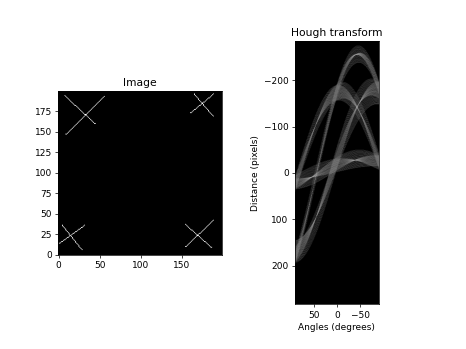

9

In [10]:
%matplotlib notebook
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np

# True if two mouse clicks should draw a line, false if single clicks draw points
lines = True


steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
img = np.zeros((200,200))


def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    

def disp_and_comp():
    """Computes Line Hough transform; displays image and result
    
    Args:
    
    Returns:
    
    """
    ax1.imshow(img, origin = 'lower', cmap='gray')
    
    out, angles, d = hough_line(img)
    ax2.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]], origin = 'lower', cmap='gray')
    
    fig.canvas.draw()

    
first_point = True
p1 = (0,0)
def on_press(event):
    """Draws either line or point and calls disp_and_comp
    
    Reacts to mouse clicks. Draws either point at mouse
    position and computes Hough transform or draws line
    between first and second mouse click and then computes
    hough transfom.
    
    Args:
        event (event): Mouseevent.
    
    Returns:
    
    """
    global p1, first_point
    y = int(event.xdata)
    x = int(event.ydata)
    
    if (lines):
        if (first_point):
            p1 = (x,y)
            img[x, y] = 255
            first_point = False
        else:
            line(img,p1,(x,y)) 
            first_point = True
        disp_and_comp()
    else:
        img[x, y] = 255
        disp_and_comp()
    
    

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121)
plt.title('Image')

ax2 = fig.add_subplot(122)
plt.title('Hough transform');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')


disp_and_comp()
#plt.axis('square')
fig.canvas.mpl_connect('button_press_event', on_press)

# YOUR CODE HERE

## Assignment 3: Implementing Hough transform [7 Points]

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

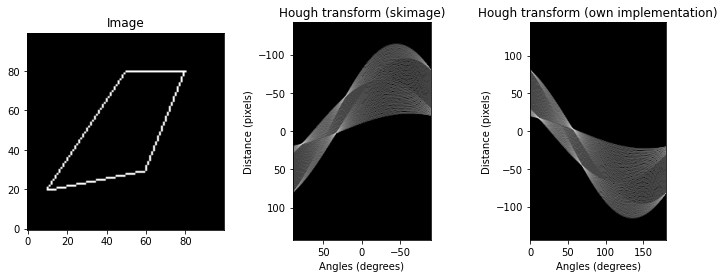

In [49]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    
    #Von wo bis wo sollen die Winkel verlaufen + Umrechnung in Radiant -> x-Achse des Akkumulator space
    thetas = np.deg2rad(np.arange(-angles/2, angles/2))
    
    width, height = img.shape
    
    #Feststellen der Bilddiagonale und ganzzahlig aufrunden
    diag_len = np.ceil(np.sqrt(width * width + height * height))
    
    diag_len=int(diag_len)
    
    #rho von -diag_len bis diag_len -> Das wird y-Achse des accumulator space 
    rhos = np.linspace(-diag_len,diag_len,diag_len*2)
    
    #Das sind ebenfalls listen!
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    
    #Anzahl der Winkel -> entspricht angles
    num_thetas = len(thetas)    
    
    #initialisieren des accumulator space mit nullen
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    
    #Erfassen der Koordinaten aller Pixel ohne null, also aller Kantenpixel
    y_idxs, x_idxs = np.nonzero(img)
    
    #Äußere Schleife läuft bis zum letzen Pixel mit einem Wert größer null
    for i in range(len(y_idxs)):
        #Auswahl einer koordinate für die Kalkulation
        x = x_idxs[i]
        y = y_idxs[i]
        
        #Innere Schleife wendet nun mathematische Gleichung auf die Koordinate für jeden Winkel an. Jeder Wert wird zudem in die Mitte geschoben.
        for t_idx in range(num_thetas):
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
            accumulator[rho, t_idx] += 1
   
    
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
    return accumulator


img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]], origin = 'lower')


my_out = my_hough_line(img)
plt.subplot(1,3,3) ; plt.title('Hough transform (own implementation)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1+my_out), extent=[0, 180, -144, 144])
plt.show()


**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


Linear Hough transform is only invertible if it was conducted with orientation information, so including the gradient direction.

In [ ]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np


# YOUR CODE HERE

def my_inverse_hough_line(accumulator, shape):
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    img = np.zeros(shape, np.uint64)
    
    # YOUR CODE HERE
    return img

img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]])

img2 = my_inverse_hough_line(out, img.shape)
plt.subplot(1,3,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')
plt.show()

## Assignment 4: Circular Hough [7 Points]

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

Circular Hough transform searches for circles and round objects instead of edges and lines. Therefore the accumulator space gets three dimensions: xc, yc and r (where xc and yc are in the image plane). This means the image plane itself is the accumulator space

**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

In [ ]:
from skimage.transform import hough_line
from scipy import misc
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

# load the image
img = imread('images/xmas.png')

# YOUR CODE HERE

## Assignment 5: Application: Eye detection [Bonus]

**Bonus:** If you do this exercise, you may leave out one of the others.

**a)** It was suggested in the lecture, that circular Hough transform can be used to implement a simple
form of “eye tracking”. Try this using your webcam.

Hints:
* You may start with a single snapshot (or some other image of a face from wherever you like) before applying your function to a video stream.
* You may start using functions like `hough_circle` from `skimage.transform`, which implement circular Hough transform.
* You may try to apply some preprocessing to detect edges or regions prior to Hough transform (you may use anything you know from the lecture).
* `hough_circle` may be inappropriate, as it is designed to detect full circles, while eyes are often partially occluded. You may implement your own Hough transforms, which detects this kind of incomplete circles.
* You may apply additional knowledge to detect eyes, e.g. that they usually occur in pairs. You may also use the approximate size and position from last frame.

In [ ]:
import cv2
import numpy as np
from cvloop import cvloop

# Depending on your webcam you might need to adapt parameters, to make
# the solution work on your machine.



def detect_eyes(img):
    """Find pairs of eyes in image based on circular Hough transform.
    
    Args:
        img (ndarray): The RGB input image to detect the eyes in. shape=(h, w, 3)
        
    Returns:
        ndarray: The image with detected eyes highlighted.
    
    """
    # YOUR CODE HERE

cvl = cvloop(function=detect_eyes)